In [11]:
import numpy as np

% matplotlib inline
import time
import pylab as pl
from IPython import display

# left side – Dirichlet condition
# c(0,t) = 0
# right side - von Neumann condition
# dc/dx (L,t) = 0 
# Initial condition:
# c(x,0) = f(x)


In [20]:
def do_plot(v, grid):
    pl.subplot(211)
    pl.plot(grid, v)

    display.clear_output(wait=True)
    display.display(pl.gcf())
    pl.cla()
    pl.ylim(-0.1, 0.2)

    pl.xlabel('Position (m)')
    pl.ylabel('Concentration (kg/m^3)')
    pl.title('Concentration in position')
#     pl.xlim(0,length)
#     time.sleep(0.2)


def do_plot_time(n, v, c):
    pl.plot(n, v, c, markersize=1)


def f(x):
    #     print("x: "+str(x)+" lip: "+str(int(lip))+" r: "+str(x != int(lip)));
    result = c0
    if x != int(lip / dx):
        result = 0.0
    else:
        print("TRUE")
    return result


def init_matrix():
    matrix = np.zeros((SIZE_X, SIZE_T))
    matrix[0, :] = 0.0
    for x in range(0, SIZE_X):
        matrix[x, 0] = f(x)
    print(matrix.round(4))
    return matrix


def do_compute(n, j, c):
    return c[j, n] + p1 * c[j + 1, n] - p2 * c[j, n] + p3 * c[j - 1, n] + p4 * c[j - 2, n]


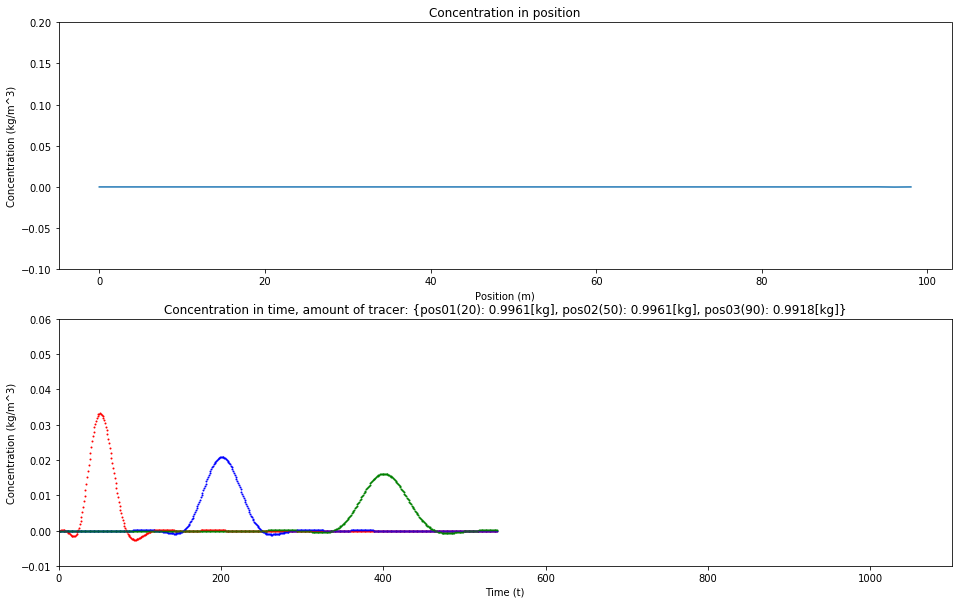

s1: 0.9960680299128954 s2: 0.9960937500252448 s3: 0.9921117023859777


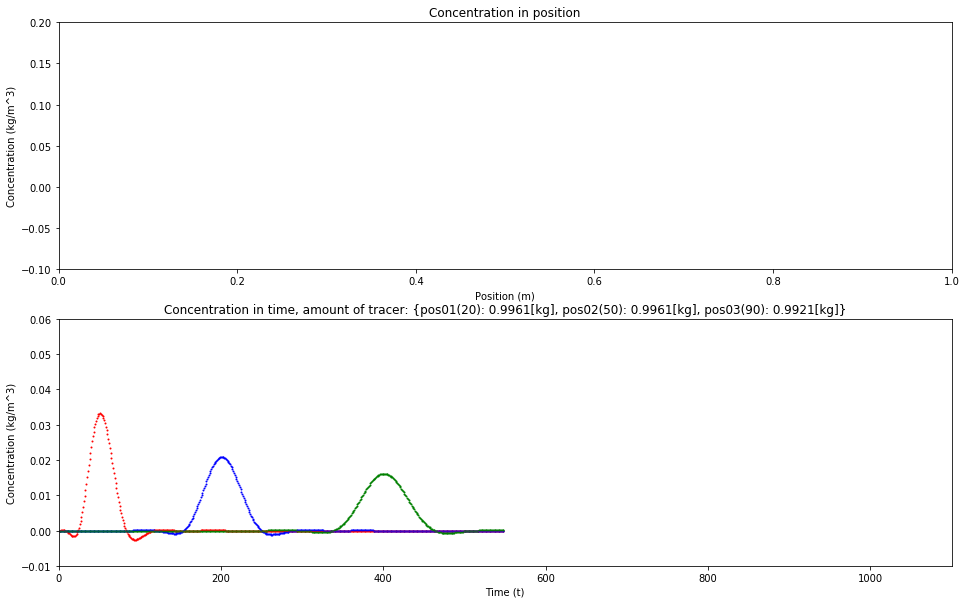

In [21]:
# Variable initiation

length = 100.0  # 100.0 # m
width = 5.0  # m
depth = 1.0  # m
U = 0.1  # m/s - advection coefficient - mean flow velocity
D = 0.01  # m^2/s - dispersion coefficient
lip = 10.0  # m - location of the injection point
lmp = 90.0  # m - location of the measurement point
air = 1.0  # kg - amount of injected tracer

dx = 2.0  # – spatial resolution
dt = 2.0  # – time step

epochs = 1100.0
# f(x) = 1 # – function describing the initial distribution of the tracer


c0 = air / (width * depth * dx)  # – initial concentration in the injection point

Ca = U * dt / dx
Cd = D * dt / (dx ** 2)

SIZE_T = int(epochs / dt)  # – number of time steps
SIZE_X = int(length / dx)  # – number of computational nodes

plotEvery = 10

p1 = Cd * (1 - Ca) - (Ca / 6) * (Ca ** 2 - 3 * Ca + 2)
p2 = Cd * (2 - 3 * Ca) - (Ca / 2) * (Ca ** 2 - 2 * Ca - 1)
p3 = Cd * (1 - 3 * Ca) - (Ca / 2) * (Ca ** 2 - Ca - 2)
p4 = Cd * Ca + (Ca / 6) * (Ca ** 2 - 1)

c = init_matrix()

fig = pl.figure(figsize=(16, 10))

gridX = np.arange(0, length, dx)
gridT = np.arange(0, epochs, dt)

s1 = 0
s2 = 0
s3 = 0

point01 = 20
point02 = 50
point03 = 90

mp01 = int(point01 / dx)
mp02 = int(point02 / dx)
mp03 = int(point03 / dx)

print(c0 * dt)
for n in range(SIZE_T - 1):
    for j in range(2, SIZE_X - 1):
        c[j, n + 1] = do_compute(n, j, c)

    mpv1 = c[mp01, n] * dt * (width * depth) / 10
    mpv2 = c[mp02, n] * dt * (width * depth) / 10
    mpv3 = c[mp03, n] * dt * (width * depth) / 10

    s1 += mpv1
    s2 += mpv2
    s3 += mpv3

    if n % plotEvery == 1:
        do_plot(c[:, n], gridX)
        print("s1: " + str(s1) + " s2: " + str(s2) + " s3: " + str(s3))

        pl.subplot(212)
        pl.xlim(0, epochs)
        pl.ylim(-0.01, 0.06)
        pl.xlabel('Time (t)')
        pl.ylabel('Concentration (kg/m^3)')
        pl.title('Concentration in time, amount of tracer: {pos01(' + str(point01) + '): ' + str(
            round(s1, 4)) + '[kg], pos02(' + str(point02) + '): ' + str(round(s2, 4)) + '[kg], pos03(' + str(
            point03) + '): ' + str(round(s3, 4)) + '[kg]}')

    do_plot_time(n, mpv1, 'ro')
    do_plot_time(n, mpv2, 'bo')
    do_plot_time(n, mpv3, 'go')
